In [1]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict

In [2]:
API_URL = "http://localhost:8000"

def get_versions():
    response = requests.get(f"{API_URL}/versions")
    return response.json()

def get_schema_timestamps(version):
    response = requests.get(f"{API_URL}/archive/schema/{version}")
    return response.json()

def get_schema_data(version, timestamp):
    response = requests.get(f"{API_URL}/archive/schema/{version}/{timestamp}")
    return response.json()

In [3]:
get_versions()

{'versions': ['v1', 'default']}

In [4]:
get_schema_timestamps("v1")

[103,
 20,
 98,
 77,
 61,
 36,
 41,
 16,
 57,
 94,
 82,
 6,
 7,
 83,
 95,
 56,
 17,
 40,
 37,
 60,
 99,
 76,
 21,
 102,
 47,
 10,
 109,
 51,
 92,
 84,
 105,
 26,
 71,
 88,
 67,
 30,
 31,
 89,
 66,
 70,
 27,
 104,
 1,
 85,
 93,
 108,
 50,
 11,
 46,
 69,
 2,
 86,
 90,
 28,
 53,
 12,
 45,
 32,
 65,
 73,
 24,
 107,
 49,
 48,
 110,
 106,
 25,
 72,
 64,
 33,
 44,
 13,
 52,
 29,
 91,
 68,
 87,
 3,
 34,
 63,
 8,
 75,
 22,
 59,
 101,
 18,
 38,
 4,
 80,
 79,
 96,
 55,
 14,
 43,
 42,
 15,
 54,
 78,
 97,
 81,
 5,
 39,
 19,
 58,
 100,
 23,
 74,
 62,
 9,
 35]

In [6]:
get_schema_data("v1", 7)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'node_types': {'Parts': ['node_type',
   'name',
   'description',
   'type',
   'cost',
   'importance',
   'expected_life',
   'id'],
  'Supplier': ['node_type', 'name', 'location', 'reliability', 'size', 'id'],
  'Warehouse': ['node_type',
   'id',
   'name',
   'type',
   'size',
   'location',
   'max_capacity',
   'current_capacity',
   'safety_stock']},
 'relationship_types': {},
 'node_values': {'Parts': [['Parts',
    'BRMfLGbh',
    'lPLFPdnu',
    'qIBXawpO',
    922.72,
    76,
    36,
    'parts_3d7348f7'],
   ['Parts',
    'kHLTXKWY',
    'rTvkuVpr',
    'GJseULMN',
    898.46,
    4,
    86,
    'parts_e84b036c'],
   ['Parts',
    'oqdASOTl',
    'hRZQHysZ',
    'kiujSVcr',
    734.55,
    95,
    66,
    'parts_a92874e7']],
  'Supplier': [['Supplier',
    'bjgxMDud',
    'BSABAnvl',
    448.97,
    'cTmLeLDX',
    'supplier_1d7df75b'],
   ['Supplier',
    'eHRJtfPD',
    'AlUPagvH',
    458.88,
    'kDotIHNG',
    

In [7]:
def decompress_schema(compressed_data):
    decompressed = {
        "directed": compressed_data["directed"],
        "multigraph": compressed_data["multigraph"],
        "graph": compressed_data["graph"],
        "nodes": [],
        "links": []
    }
    
    # Decompress nodes
    for node_type, keys in compressed_data["node_types"].items():
        for values in compressed_data["node_values"][node_type]:
            node = dict(zip(keys, values))
            decompressed["nodes"].append(node)
    
    # Decompress links
    for values in compressed_data["link_values"]:
        rel_type = values[0]  # Assuming relationship_type is always first
        keys = compressed_data["relationship_types"][rel_type]
        link = dict(zip(keys, values))
        decompressed["links"].append(link)
    
    return decompressed
decompress_schema(get_schema_data("v1", 7))

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'node_type': 'Parts',
   'name': 'BRMfLGbh',
   'description': 'lPLFPdnu',
   'type': 'qIBXawpO',
   'cost': 922.72,
   'importance': 76,
   'expected_life': 36,
   'id': 'parts_3d7348f7'},
  {'node_type': 'Parts',
   'name': 'kHLTXKWY',
   'description': 'rTvkuVpr',
   'type': 'GJseULMN',
   'cost': 898.46,
   'importance': 4,
   'expected_life': 86,
   'id': 'parts_e84b036c'},
  {'node_type': 'Parts',
   'name': 'oqdASOTl',
   'description': 'hRZQHysZ',
   'type': 'kiujSVcr',
   'cost': 734.55,
   'importance': 95,
   'expected_life': 66,
   'id': 'parts_a92874e7'},
  {'node_type': 'Supplier',
   'name': 'bjgxMDud',
   'location': 'BSABAnvl',
   'reliability': 448.97,
   'size': 'cTmLeLDX',
   'id': 'supplier_1d7df75b'},
  {'node_type': 'Supplier',
   'name': 'eHRJtfPD',
   'location': 'AlUPagvH',
   'reliability': 458.88,
   'size': 'kDotIHNG',
   'id': 'supplier_f0a4eb17'},
  {'node_type': 'Supplier',
   'name': 'co

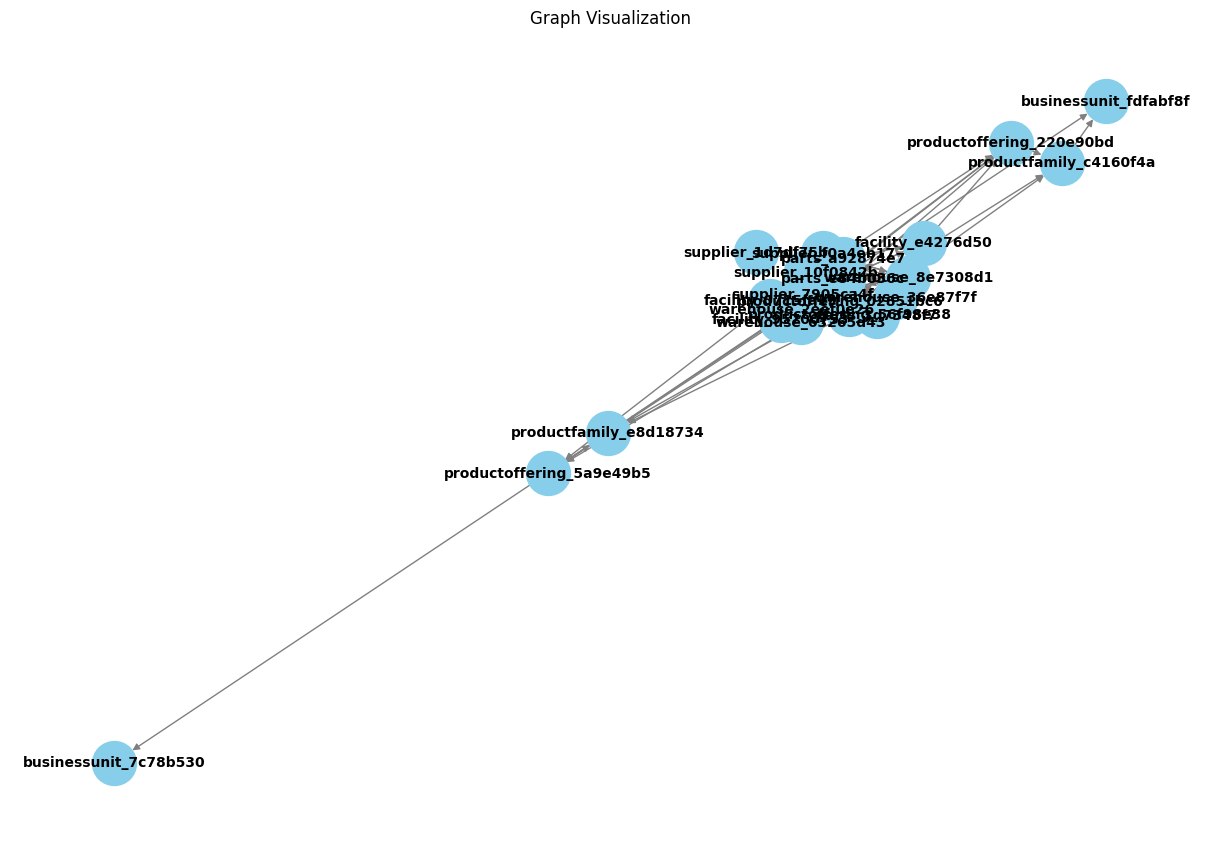

In [11]:
from networkx.readwrite import json_graph
G = json_graph.node_link_graph(decompress_schema(get_schema_data("v1", 102)))

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Graph Visualization")
plt.show()
